In [1]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop, Adam
from keras.utils.data_utils import get_file
import numpy as np
import pandas as pd
import random
import sys
import io
import re
from unidecode import unidecode
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


In [2]:
csv = 'brz_dictatorship.csv'
songs = pd.read_csv(csv)

In [3]:
def get_tokenized_lines(df):
    words = []
    
    for index, row in df['song_lyrics'].iteritems():
        row = str(row).lower()
        for line in row.split('|-|'):
            new_words = re.findall(r"\b[a-z']+\b", unidecode(line))
            words = words + new_words
    
    return words

In [4]:
all_lyric_lines = get_tokenized_lines(songs)

In [5]:
SEQ_LENGTH = 50 + 1
sequences = list()

for i in range(SEQ_LENGTH, len(all_lyric_lines)):
    seq = all_lyric_lines[i - SEQ_LENGTH: i]
    sequences.append(seq)

print('Total Sequences: %d' % len(sequences))

Total Sequences: 19402


In [6]:
def save_doc(lines, filename):
    for line in lines:
        data = ' '.join(line)
        
    '\n'.join(data)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [7]:
out_filename = 'sequences.txt'
save_doc(sequences, out_filename)

In [8]:
vocab = set(all_lyric_lines)

word_to_index = {w: i for i, w in enumerate(vocab)}
index_to_word = {i: w for w, i in word_to_index.items()}
word_indices = [word_to_index[word] for word in vocab]
vocab_size = len(vocab)

print('vocabulary size: {}'.format(vocab_size))

vocabulary size: 4074


In [9]:
def get_tokenized_lines(lines, seq_len):
    tokenized = np.zeros((len(lines), seq_len))
    
    for r, line in enumerate(lines):
        for c, word in enumerate(line):
            tokenized[r, c] = word_to_index[word]
    return tokenized

In [10]:
tokenized_seq = get_tokenized_lines(sequences, SEQ_LENGTH)

In [11]:
tokenized_seq[:, -1].shape

(19402,)

In [12]:
from keras.utils import to_categorical

X, y = tokenized_seq[:, :-1], tokenized_seq[:, -1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = len(X[0])

In [13]:
print("X_shape", X.shape)
print("y_shape", y.shape)

X_shape (19402, 50)
y_shape (19402, 4074)


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, Embedding


model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, batch_size=128, epochs=50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            203700    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 100)           60400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 4074)              411474    
Total params: 766,074
Trainable params: 766,074
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
19402/19402 [==============================] - 94s 5ms/step - loss: 7.6027 - acc: 0.0342
Epoch 2/50
19402/19402 [=======

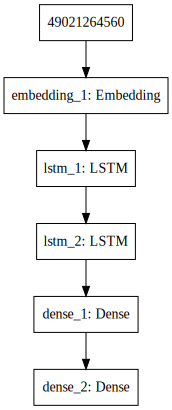

In [154]:
import matplotlib.pyplot as plt
import keras
import pydot as pyd
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


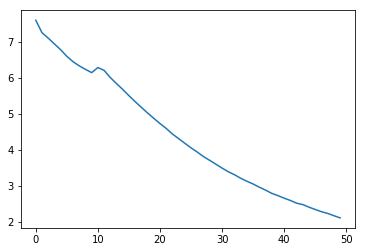

In [32]:
plt.plot(history.history['loss'])

In [33]:
model.save('model.h5')

In [34]:
from keras.models import load_model

model = load_model('model.h5')

In [37]:
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text
# in_filename = 'data/clean_sequences.txt'
# doc = load_doc(in_filename)
# lines = doc.split('\n')

In [38]:
# load cleaned text sequences

seq_length = SEQ_LENGTH - 1

In [149]:
seed_text = "vai ja embora sol agora vai nascer sorriso calice morreeu sinto amor crescera brisa desliza friaparece falar amoreu sinto vocepor pertotodo carinho todo calor ja emborao sol agora vai nascerenquanto sorriso morreeu sinto amor crescera brisa desliza friaparece falar amoreu sinto  pertotodo carinho todo calor calice sangue problema roda viva morte"
print(len(seed_text.split()))


51


In [150]:
def texts_to_sequences(texts, word_to_index):
    indices = np.zeros((1, len(texts)), dtype=int)
    
    for i, text in enumerate(texts):
        indices[:, i] = word_to_index[text]
        
    return indices

In [151]:
def my_pad_sequences(seq, maxlen):
    start = seq.shape[1] - maxlen
    #print(start)
    return seq[:, start: start + maxlen]

In [152]:
def generate_seq(model, word_to_index, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text

    for _ in range(n_words):
        encoded = texts_to_sequences(in_text.split()[1:], word_to_index)
        #print(encoded)
        encoded = my_pad_sequences(encoded, maxlen=seq_length)
        #print(encoded)
        
        yhat = model.predict_classes(encoded, verbose=0)
        out_word = ''
    
        for word, index in word_to_index.items():
            if index == yhat:
                out_word = word
                break
        
        in_text += ' ' + out_word
        result.append(out_word)
        
    return ' '.join(result)

In [153]:
generated = generate_seq(model, word_to_index, seq_length, seed_text, 50)
print(generated)

linda queriam pouca culpam cheguei atras fluminense funde ancho livres peito perdido dia sima d emandam tata estudar valsa alguemrefraof nuvens la sertaoos brucos queres negro gato choram diz sima dse erguem taca tata ideal guerrilheira contigoquero querem gloria vivem suspirar tocavam solenes garoa novos continua carcara autenticando passos atraves
